In [108]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.gridspec import GridSpec
import linmix
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import mplpresets
import plotfunctions

In [184]:
fullcleardf = pd.read_csv('data/fullcleardf.csv')
sortedclearmergedf = pd.read_csv('data/sortedclearmergedf.csv')
barrodf =  pd.read_csv('data/barrodf.csv')
barromiddf =  pd.read_csv('data/barromiddf.csv')

limitdf = pd.read_csv('data/limitdf.csv')
limitbetanegdf = pd.read_csv('data/limitbetanegdf.csv')
limitpabdcdf = pd.read_csv('data/limitpabdcdf_avcor_csv.csv')
dclimitdf = pd.read_csv('data/dclimitdf.csv')
dclimitbetanegdf = pd.read_csv('data/dclimitbetanegdf.csv')


sortedpabdf = pd.read_csv('data/sortedpabdf.csv')
fullmergedf = pd.read_csv('data/fullmergePAB.csv')
fullmergebaddf = pd.read_csv('data/fullmergebadPAB.csv')
samplepabdcdf = pd.read_csv('data/samplepabdcdf_avcor.csv')

dustdf = pd.read_csv('data/dustdfPAB.csv')
dustcurvesdf = pd.read_csv('data/dustcurvesdf.csv')
attdf = pd.read_csv('data/attdfPAB.csv')

dcmergedf = pd.read_csv('data/dcmergePAB.csv')
dcsampledf = pd.read_csv('data/dcsampledf.csv')
morphdf = pd.read_csv('data/morphdf.csv')
dcmorphdf = pd.read_csv('data/dcmorphdf.csv')

fullmergedfsnr3 = pd.read_csv('data/fullmergedfsnr3.csv')
fullmergedfsnr3s = pd.read_csv('data/fullmergedfsnr3s.csv')
dcmergedfsnr3 = pd.read_csv('data/dcmergedfsnr3.csv')
dcmergedfsnr3s = pd.read_csv('data/dcmergedfsnr3s.csv')
dcsampledfsnr3 = pd.read_csv('data/dcsampledfsnr3.csv')
dcsampledfsnr3s = pd.read_csv('data/dcsampledfsnr3s.csv')
morphdfsnr3 = pd.read_csv('data/morphdfsnr3.csv')
morphdfsnr3s = pd.read_csv('data/morphdfsnr3s.csv')
dcmorphdfsnr3 = pd.read_csv('data/dcmorphdfsnr3.csv')
dcmorphdfsnr3s = pd.read_csv('data/dcmorphdfsnr3s.csv')

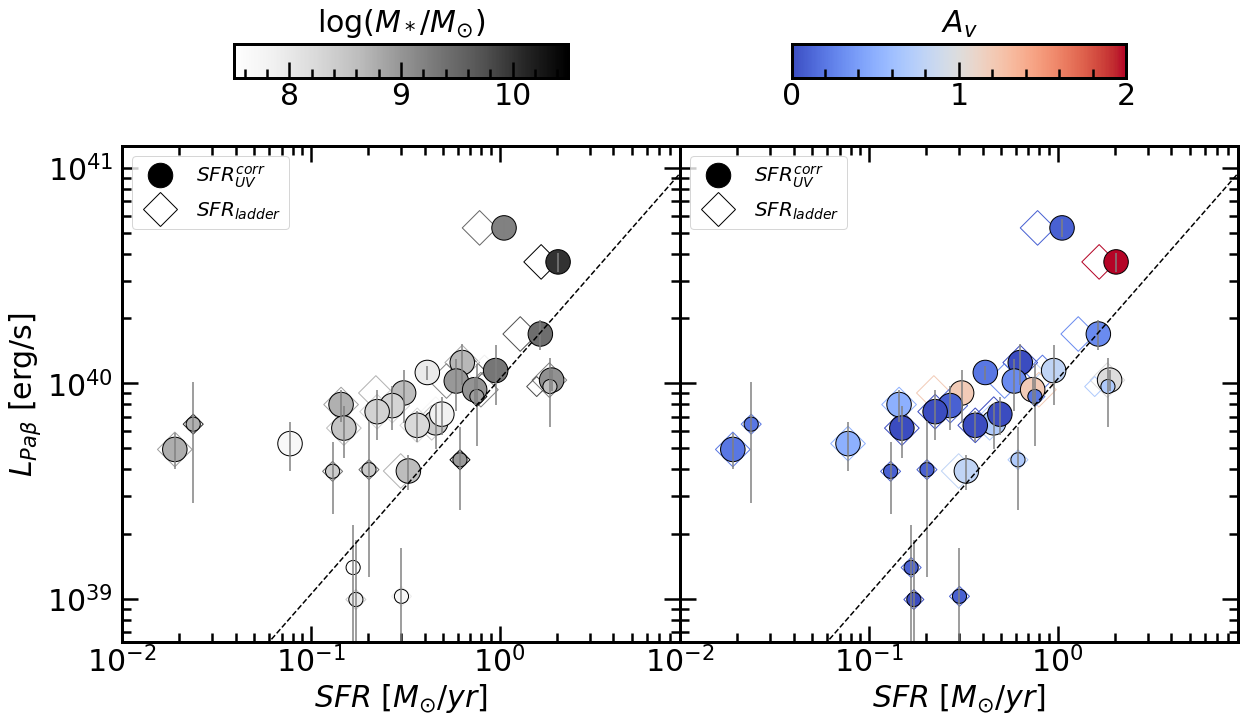

In [138]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$L_{Pa\beta}$ [erg/s]")
y0 = ax0.scatter(fullmergedfsnr3['ir_SFR-UV_corr'], fullmergedfsnr3['PAB_L'], s=600, c=fullmergedfsnr3['td_lmass'], ec='black', cmap='Greys', vmin=7.5, vmax=10.5)
ax0.scatter(fullmergedfsnr3s['ir_SFR-UV_corr'], fullmergedfsnr3s['PAB_L'], s=200, c=fullmergedfsnr3s['td_lmass'], ec='black',  cmap='Greys', vmin=7.5, vmax=10.5)
ax0.errorbar(fullmergedfsnr3['ir_SFR-UV_corr'] , fullmergedfsnr3['PAB_L'] , yerr = fullmergedfsnr3['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
ax0.errorbar(fullmergedfsnr3s['ir_SFR-UV_corr'] , fullmergedfsnr3s['PAB_L'] , yerr = fullmergedfsnr3s['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
scatterdots = ax0.scatter(fullmergedfsnr3['ir_SFR-ladder_total'], fullmergedfsnr3['PAB_L'], s=600, fc='none', c=fullmergedfsnr3['td_lmass'], cmap='Greys', marker = 'D', zorder=-1)
scatterdotss = ax0.scatter(fullmergedfsnr3s['ir_SFR-ladder_total'], fullmergedfsnr3s['PAB_L'], s=200, fc='none',c=fullmergedfsnr3s['td_lmass'], cmap='Greys', marker = 'D', zorder=-1)
ax0.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax0.axis([10**-2 , 9 , 10**38.8, 10**41.1])
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel(r"$SFR$ [$M_{\odot}/yr$]")
legend_elements0 = [Line2D([0], [0], marker='o', color='none', label='$SFR_{UV}^{corr}$', markerfacecolor='black', markersize=np.sqrt(600)),
                    Line2D([0], [0], marker='D', color='none', label='$SFR_{ladder}$', markerfacecolor='none', markeredgecolor='black', markersize=np.sqrt(600))]
ax0.legend(handles=legend_elements0)

ax1 = fig.add_subplot(gs[2:12, 5:10])
y1 = ax1.scatter(fullmergedfsnr3['ir_SFR-UV_corr'], fullmergedfsnr3['PAB_L'], s=600, c=fullmergedfsnr3['td_Av'], ec='black', cmap='coolwarm', vmin=0, vmax=2)
ax1.scatter(fullmergedfsnr3s['ir_SFR-UV_corr'], fullmergedfsnr3s['PAB_L'], s=200, c=fullmergedfsnr3s['td_Av'], ec='black', cmap='coolwarm', vmin=0, vmax=2)
ax1.errorbar(fullmergedfsnr3['ir_SFR-UV_corr'] , fullmergedfsnr3['PAB_L'] , yerr = fullmergedfsnr3['PAB_L_ERR']  , linestyle = 'None' , c = 'grey' )
ax1.errorbar(fullmergedfsnr3s['ir_SFR-UV_corr'] , fullmergedfsnr3s['PAB_L'] , yerr = fullmergedfsnr3s['PAB_L_ERR']  , linestyle = 'None' , c = 'grey')
ax1.scatter(fullmergedfsnr3['ir_SFR-ladder_total'], fullmergedfsnr3['PAB_L'], s=600, fc='none', c=fullmergedfsnr3['td_Av'], cmap='coolwarm', vmin=0, vmax=2, marker = 'D', zorder=-1)
ax1.scatter(fullmergedfsnr3s['ir_SFR-ladder_total'], fullmergedfsnr3s['PAB_L'], s=200, fc='none',c=fullmergedfsnr3s['td_Av'], cmap='coolwarm', vmin=0, vmax=2, marker = 'D', zorder=-1) 
ax1.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax1.axis([10**-2 , 9 , 10**38.8, 10**41.1])
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(labelleft = False)
ax1.set_xlabel(r"$SFR$ [$M_{\odot}/yr$]")
legend_elements1 = [Line2D([0], [0], marker='o', color='none', label='$SFR_{UV}^{corr}$', markerfacecolor='black', markersize=np.sqrt(600)),
                    Line2D([0], [0], marker='D', color='none', label='$SFR_{ladder}$', markerfacecolor='none', markeredgecolor='black', markersize=np.sqrt(600))]
ax1.legend(handles=legend_elements1)


ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')

ax5 = fig.add_subplot(gs[0:1,6:9])
cb2 = fig.colorbar(y1,ax5,use_gridspec=True,orientation='horizontal' ,  label = '$A_v$')
#ax5.set_clim(0 , 2)
ax5.xaxis.set_label_position('top')
ax5.xaxis.get_label().set_verticalalignment('bottom')

plt.show()

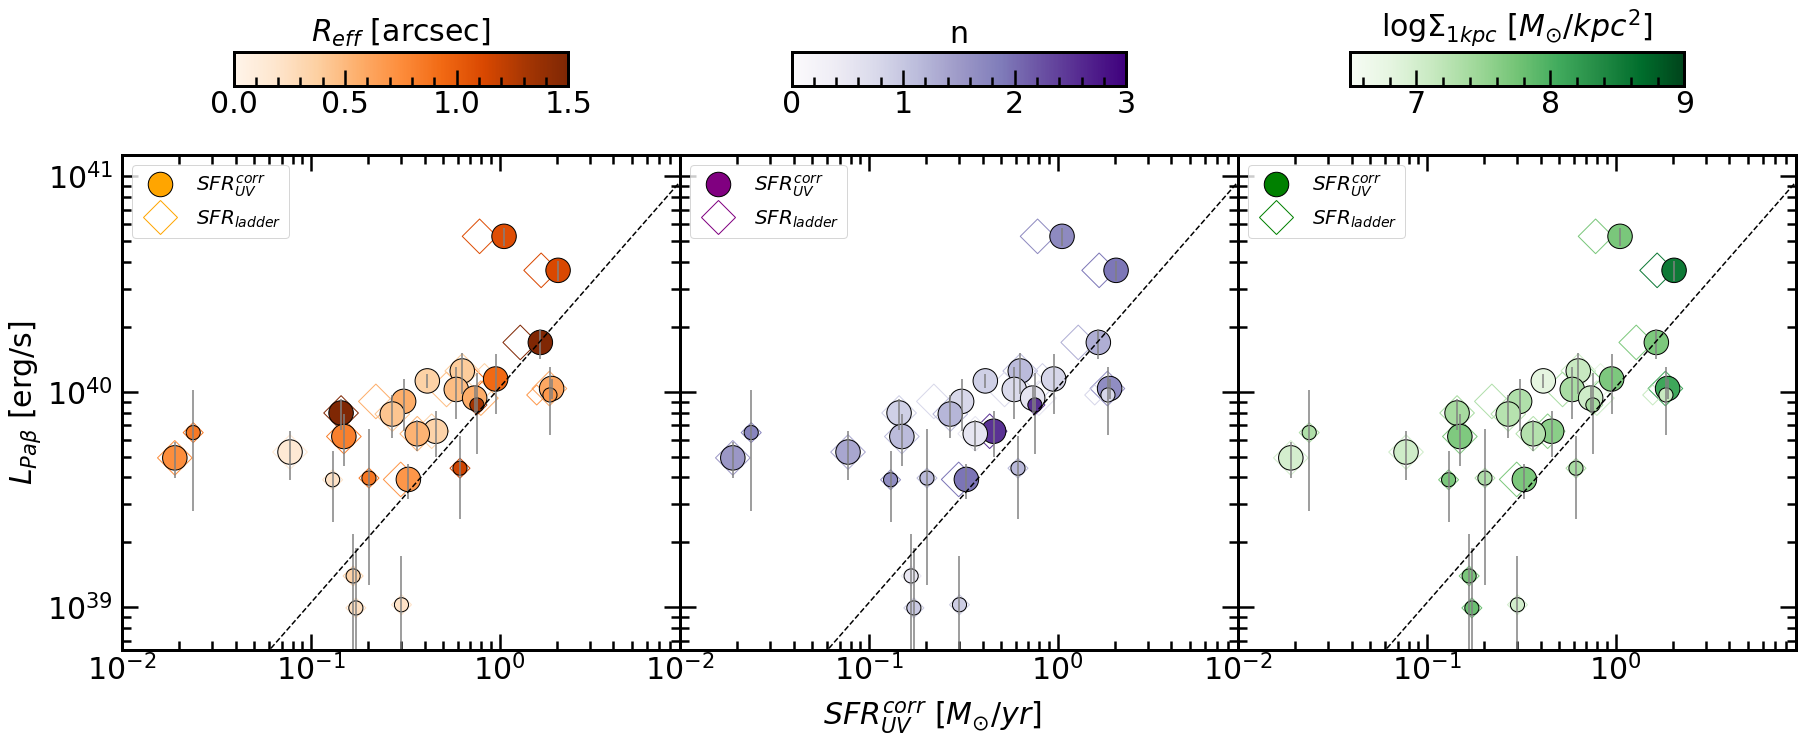

In [144]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$L_{Pa\beta}$ [erg/s]")
y0 = ax0.scatter(morphdfsnr3['ir_SFR-UV_corr'] , morphdfsnr3['PAB_L'] , s=600, c=morphdfsnr3['gf_re_j'], ec='black', cmap='Oranges', vmin=0, vmax=1.5)
y0 = ax0.scatter(morphdfsnr3s['ir_SFR-UV_corr'] , morphdfsnr3s['PAB_L'] , s=200, c=morphdfsnr3s['gf_re_j'], ec='black', cmap='Oranges', vmin=0, vmax=1.5)
ax0.errorbar(morphdfsnr3['ir_SFR-UV_corr']  , morphdfsnr3['PAB_L']  , yerr = morphdfsnr3['PAB_L_ERR']   , linestyle = 'None' , c = 'grey' )
ax0.errorbar(morphdfsnr3s['ir_SFR-UV_corr']  , morphdfsnr3s['PAB_L']  , yerr = morphdfsnr3s['PAB_L_ERR']   , linestyle = 'None' , c = 'grey' )
ax0.scatter(morphdfsnr3['ir_SFR-ladder_total'] , morphdfsnr3['PAB_L'] , s=600, c=morphdfsnr3['gf_re_j'], fc='None' , cmap='Oranges', marker = 'D', zorder=-1, vmin=0, vmax=1.5)
ax0.scatter(morphdfsnr3s['ir_SFR-ladder_total'] , morphdfsnr3s['PAB_L'] , s=200, c=morphdfsnr3s['gf_re_j'], fc='None' , cmap='Oranges', marker = 'D', zorder=-1, vmin=0, vmax=1.5)
ax0.axis([10**-2 , 9 , 10**38.8, 10**41.1])
ax0.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax0.set_xscale('log')
ax0.set_yscale('log')
legend_elements0 = [Line2D([0], [0], marker='o', color='none', label='$SFR_{UV}^{corr}$', markerfacecolor='orange', markersize=np.sqrt(600)),
                    Line2D([0], [0], marker='D', color='none', label='$SFR_{ladder}$', markerfacecolor='none', markeredgecolor='orange', markersize=np.sqrt(600))]
ax0.legend(handles=legend_elements0)

ax1 = fig.add_subplot(gs[2:12, 5:10])
y1 = ax1.scatter(morphdfsnr3['ir_SFR-UV_corr'] , morphdfsnr3['PAB_L'] , s=600, c=morphdfsnr3['gf_n_j'], ec='black', cmap='Purples', vmin=0, vmax=3)
y1 = ax1.scatter(morphdfsnr3s['ir_SFR-UV_corr'] , morphdfsnr3s['PAB_L'] , s=200, c=morphdfsnr3s['gf_n_j'], ec='black', cmap='Purples', vmin=0, vmax=3)
ax1.errorbar(morphdfsnr3['ir_SFR-UV_corr']  , morphdfsnr3['PAB_L']  , yerr = morphdfsnr3['PAB_L_ERR']   , linestyle = 'None' , c = 'grey' )
ax1.errorbar(morphdfsnr3s['ir_SFR-UV_corr']  , morphdfsnr3s['PAB_L']  , yerr = morphdfsnr3s['PAB_L_ERR']   , linestyle = 'None' , c = 'grey' )
ax1.scatter(morphdfsnr3['ir_SFR-ladder_total'] , morphdfsnr3['PAB_L'] , s=600, c=morphdfsnr3['gf_n_j'], fc='None' , cmap='Purples', marker = 'D', zorder=-1, vmin=0, vmax=3)
ax1.scatter(morphdfsnr3s['ir_SFR-ladder_total'] , morphdfsnr3s['PAB_L'] , s=200, c=morphdfsnr3s['gf_n_j'], fc='None' , cmap='Purples', marker = 'D', zorder=-1, vmin=0, vmax=3)
ax1.axis([10**-2 , 9 , 10**38.8, 10**41.1])
ax1.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax1.tick_params(labelleft = False)
ax1.set_xscale('log')
ax1.set_yscale('log')
legend_elements1 = [Line2D([0], [0], marker='o', color='none', label='$SFR_{UV}^{corr}$', markerfacecolor='purple', markersize=np.sqrt(600)),
                    Line2D([0], [0], marker='D', color='none', label='$SFR_{ladder}$', markerfacecolor='none', markeredgecolor='purple', markersize=np.sqrt(600))]
ax1.legend(handles=legend_elements1)

ax2 = fig.add_subplot(gs[2:12, 10:15])
y2 = ax2.scatter(morphdfsnr3['ir_SFR-UV_corr'] , morphdfsnr3['PAB_L'] , s=600, c=morphdfsnr3['SIGMA_1'], ec='black', cmap='Greens', vmin=6.5, vmax=9)
y2s = ax2.scatter(morphdfsnr3s['ir_SFR-UV_corr'] , morphdfsnr3s['PAB_L'] , s=200, c=morphdfsnr3s['SIGMA_1'], ec='black', cmap='Greens', vmin=6.5, vmax=9)
ax2.errorbar(morphdfsnr3['ir_SFR-UV_corr']  , morphdfsnr3['PAB_L']  , yerr = morphdfsnr3['PAB_L_ERR']   , linestyle = 'None' , c = 'grey' )
ax2.errorbar(morphdfsnr3s['ir_SFR-UV_corr']  , morphdfsnr3s['PAB_L']  , yerr = morphdfsnr3s['PAB_L_ERR']   , linestyle = 'None' , c = 'grey' )
ax2.scatter(morphdfsnr3['ir_SFR-ladder_total'] , morphdfsnr3['PAB_L'] , s=600, c=morphdfsnr3['SIGMA_1'], fc='None' , cmap='Greens', marker = 'D', zorder=-1, vmin=6.5, vmax=9)
ax2.scatter(morphdfsnr3s['ir_SFR-ladder_total'] , morphdfsnr3s['PAB_L'] , s=200, c=morphdfsnr3s['SIGMA_1'], fc='None' , cmap='Greens', marker = 'D', zorder=-1, vmin=6.5, vmax=9)
ax2.axis([10**-2 , 9 , 10**38.8, 10**41.1])
ax2.plot([10**-4.02 , 10**1.98] , [10**36 , 10**42] , '--' , c = 'black')
ax2.tick_params(labelleft = False)
ax2.set_xscale('log')
ax2.set_yscale('log')
legend_elements2 = [Line2D([0], [0], marker='o', color='none', label='$SFR_{UV}^{corr}$', markerfacecolor='green', markersize=np.sqrt(600)),
                    Line2D([0], [0], marker='D', color='none', label='$SFR_{ladder}$', markerfacecolor='none', markeredgecolor='green', markersize=np.sqrt(600))]
ax2.legend(handles=legend_elements2)

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = '$R_{eff}$ [arcsec]')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'n')
ax4.xaxis.set_label_position('top')
ax4.xaxis.get_label().set_verticalalignment('bottom')
ax5 = fig.add_subplot(gs[0:1,11:14]) 
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = r"log$\Sigma_{1kpc}$ [$M_{\odot}/kpc^2$]")
ax5.xaxis.set_label_position('top')
ax5.xaxis.get_label().set_verticalalignment('bottom')

fig.text(0.5,0.04, r"$SFR_{UV}^{corr}$ [$M_{\odot}/yr$]", ha="center", va="center")
plt.show()

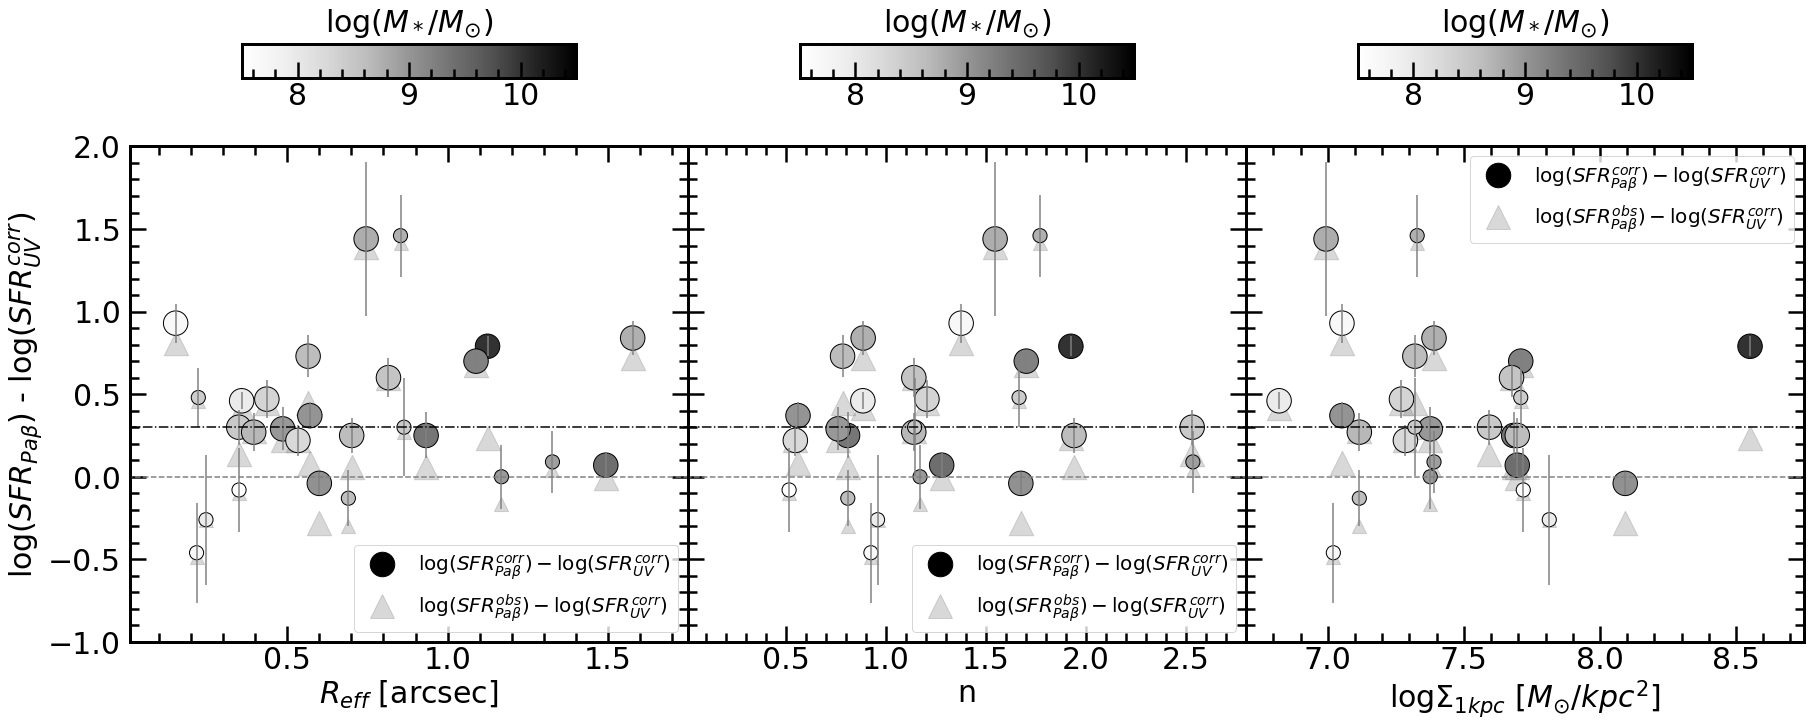

In [208]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')
ax0.set_xlabel(r"$R_{eff}$ [arcsec]")

ax0.scatter(dcmorphdfsnr3['gf_re_j_x'] , dcmorphdfsnr3['PAB_SFR_EX2_x'] , s = 600 , c = 'grey', alpha=.3, marker='^', zorder=-1)
y0 = ax0.scatter(dcmorphdfsnr3['gf_re_j_x'] , dcmorphdfsnr3['sfrratio_calz'] , s = 600 , c = dcmorphdfsnr3['td_lmass_x'], ec='black' , cmap = 'Greys', vmin=7.5, vmax=10.5)
ax0.errorbar(dcmorphdfsnr3['gf_re_j_x'], dcmorphdfsnr3['sfrratio_calz'], yerr = dcmorphdfsnr3['PAB_SFR_EX2_ERR_x'], c = 'grey',   linestyle = 'None')
ax0.scatter(dcmorphdfsnr3s['gf_re_j_x'] , dcmorphdfsnr3s['PAB_SFR_EX2_x'] , s = 200 , c = 'grey', alpha=.3, marker='^', zorder=-1)
ax0.scatter(dcmorphdfsnr3s['gf_re_j_x'] , dcmorphdfsnr3s['sfrratio_calz'] , s = 200 , c = dcmorphdfsnr3s['td_lmass_x'], ec='black' , cmap = 'Greys', vmin=7.5, vmax=10.5)
ax0.errorbar(dcmorphdfsnr3s['gf_re_j_x'], dcmorphdfsnr3s['sfrratio_calz'], yerr = dcmorphdfsnr3s['PAB_SFR_EX2_ERR_x'], c = 'grey',   linestyle = 'None')
ax0.axis([0.01 , 1.75 , -1, 2])
ax0.plot([0 , 2] , [0.3 , 0.3] , '-.' , c = 'black')
ax0.plot([0 , 2] , [0 , 0] , '--' , c = 'gray')
legend_elements0 = [Line2D([0], [0], marker='o', color='none', label=r'$\log(SFR_{Pa\beta}^{corr})-\log(SFR_{UV}^{corr})$', markerfacecolor='black',  markersize=np.sqrt(600)),
                    Line2D([0], [0], marker='^', color='none', label=r'$\log(SFR_{Pa\beta}^{obs})-\log(SFR_{UV}^{corr})$', markerfacecolor='grey', markeredgecolor='grey',alpha=.3, markersize=np.sqrt(600))]
ax0.legend(loc='lower right', handles=legend_elements0)


ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.scatter(dcmorphdfsnr3['gf_n_j_x'] , dcmorphdfsnr3['PAB_SFR_EX2_x'] , s = 600 , c = 'grey', alpha=.3, marker='^', zorder=-1)
y1 = ax1.scatter(dcmorphdfsnr3['gf_n_j_x'] , dcmorphdfsnr3['sfrratio_calz'] , s = 600 , c = dcmorphdfsnr3['td_lmass_x'], ec='black' , cmap = 'Greys', vmin=7.5, vmax=10.5)
ax1.errorbar(dcmorphdfsnr3['gf_n_j_x'], dcmorphdfsnr3['sfrratio_calz'], yerr = dcmorphdfsnr3['PAB_SFR_EX2_ERR_x'], c = 'grey',   linestyle = 'None')
ax1.scatter(dcmorphdfsnr3s['gf_n_j_x'] , dcmorphdfsnr3s['PAB_SFR_EX2_x'] , s = 200 , c = 'grey', alpha=.3, marker='^', zorder=-1)
ax1.scatter(dcmorphdfsnr3s['gf_n_j_x'] , dcmorphdfsnr3s['sfrratio_calz'] , s = 200 , c = dcmorphdfsnr3s['td_lmass_x'], ec='black' , cmap = 'Greys', vmin=7.5, vmax=10.5)
ax1.errorbar(dcmorphdfsnr3s['gf_n_j_x'], dcmorphdfsnr3s['sfrratio_calz'], yerr = dcmorphdfsnr3s['PAB_SFR_EX2_ERR_x'], c = 'grey',   linestyle = 'None')
ax1.plot([0 , 8] , [0.3 , 0.3] , '-.' , c = 'black')
ax1.plot([0 , 8] , [0 , 0] , '--' , c = 'gray')
ax1.set_xlabel(r"n")
ax1.axis([0.01 , 2.8 , -1, 2])
ax1.tick_params(labelleft = False)
legend_elements1 = [Line2D([0], [0], marker='o', color='none', label=r'$\log(SFR_{Pa\beta}^{corr})-\log(SFR_{UV}^{corr})$', markerfacecolor='black',  markersize=np.sqrt(600)),
                    Line2D([0], [0], marker='^', color='none', label=r'$\log(SFR_{Pa\beta}^{obs})-\log(SFR_{UV}^{corr})$', markerfacecolor='grey', markeredgecolor='grey',alpha=.3, markersize=np.sqrt(600))]
ax1.legend(loc='lower right', handles=legend_elements1)


ax2 = fig.add_subplot(gs[2:12, 10:15])
ax2.set_xlabel(r"log$\Sigma_{1kpc}$ [$M_{\odot}/kpc^2$]")
ax2.scatter(dcmorphdfsnr3['SIGMA_1_x'] , dcmorphdfsnr3['PAB_SFR_EX2_x'] , s = 600 , c = 'grey', alpha=.3, marker='^', zorder=-1)
y2 = ax2.scatter(dcmorphdfsnr3['SIGMA_1_x'] , dcmorphdfsnr3['sfrratio_calz'] , s = 600 , c = dcmorphdfsnr3['td_lmass_x'], ec='black' , cmap = 'Greys', vmin=7.5, vmax=10.5)
ax2.errorbar(dcmorphdfsnr3['SIGMA_1_x'], dcmorphdfsnr3['sfrratio_calz'], yerr = dcmorphdfsnr3['PAB_SFR_EX2_ERR_x'], c = 'grey',   linestyle = 'None')
ax2.scatter(dcmorphdfsnr3s['SIGMA_1_x'] , dcmorphdfsnr3s['PAB_SFR_EX2_x'] , s = 200 , c = 'grey', alpha=.3, marker='^', zorder=-1)
ax2.scatter(dcmorphdfsnr3s['SIGMA_1_x'] , dcmorphdfsnr3s['sfrratio_calz'] , s = 200 , c = dcmorphdfsnr3s['td_lmass_x'], ec='black' , cmap = 'Greys', vmin=7.5, vmax=10.5)
ax2.errorbar(dcmorphdfsnr3s['SIGMA_1_x'], dcmorphdfsnr3s['sfrratio_calz'], yerr = dcmorphdfsnr3s['PAB_SFR_EX2_ERR_x'], c = 'grey',   linestyle = 'None')
ax2.plot([0 , 10] , [0.3 , 0.3] , '-.' , c = 'black')
ax2.axis([6.7 , 8.75 , -1, 2])
ax2.plot([0 , 10] , [0 , 0] , '--' , c = 'gray')
ax2.tick_params(labelleft = False)
legend_elements2 = [Line2D([0], [0], marker='o', color='none', label=r'$\log(SFR_{Pa\beta}^{corr})-\log(SFR_{UV}^{corr})$', markerfacecolor='black',  markersize=np.sqrt(600)),
                    Line2D([0], [0], marker='^', color='none', label=r'$\log(SFR_{Pa\beta}^{obs})-\log(SFR_{UV}^{corr})$', markerfacecolor='grey', markeredgecolor='grey',alpha=.3, markersize=np.sqrt(600))]
ax2.legend(loc='upper right', handles=legend_elements2)

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax4.xaxis.set_label_position('top')
ax4.xaxis.get_label().set_verticalalignment('bottom')
ax5 = fig.add_subplot(gs[0:1,11:14])
fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax5.xaxis.set_label_position('top')
ax5.xaxis.get_label().set_verticalalignment('bottom')
plt.show()

In [213]:
print(np.mean(dcsampledf['sfrratio_calz']))
print(np.median(dcsampledf['sfrratio_calz']))
print(np.mean(dcsampledf['PAB_SFR_EX2']))
print(np.median(dcsampledf['PAB_SFR_EX2']))

0.37862068965517237
0.3
0.27608218200947776
0.2213978100011054


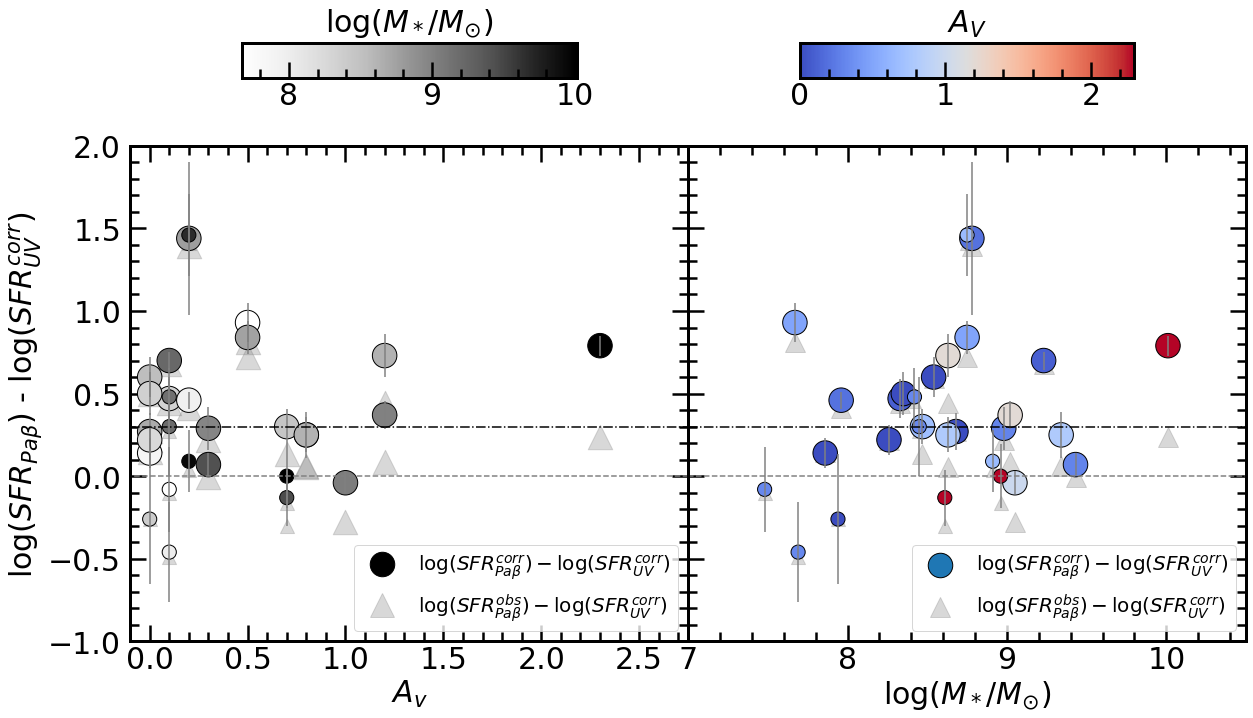

In [168]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax2 = fig.add_subplot(gs[2:12, 0:5])
y2 = ax2.scatter(dcsampledfsnr3['td_Av'] , dcsampledfsnr3['sfrratio_calz'] , s = 600 , c = dcsampledfsnr3['td_lmass'], ec='black' , cmap = 'Greys', zorder=2)
ax2.scatter(dcsampledfsnr3s['td_Av'] , dcsampledfsnr3s['sfrratio_calz'] , s = 200 , c = dcsampledfsnr3s['td_lmass'], ec='black' , cmap = 'Greys', zorder=2)
ax2.scatter(dcsampledfsnr3['td_Av'] , dcsampledfsnr3['PAB_SFR_EX2'] , s = 600 , c = 'grey', marker='^' , alpha=.3, zorder=1)
ax2.scatter(dcsampledfsnr3s['td_Av'] , dcsampledfsnr3s['PAB_SFR_EX2'] , s = 200 , c = 'grey', marker='^' , alpha=.3, zorder=1)
ax2.errorbar(dcsampledfsnr3['td_Av'] , dcsampledfsnr3['sfrratio_calz'] , yerr = dcsampledfsnr3['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
ax2.errorbar(dcsampledfsnr3s['td_Av'] , dcsampledfsnr3s['sfrratio_calz'] , yerr = dcsampledfsnr3s['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
ax2.plot([-2.5 , 4.5] , [0.3 , 0.3] , '-.' , c = 'black')
ax2.plot([-2.5 , 4.5] , [0 , 0] , '--' , c = 'gray')
ax2.set_xlabel(r"$A_v$")
ax2.axis([-.1 , 2.75 , -1 , 2])
legend_elements2 = [Line2D([0], [0], marker='o', color='none', label=r'$\log(SFR_{Pa\beta}^{corr})-\log(SFR_{UV}^{corr})$', markerfacecolor='black',  markersize=np.sqrt(600)),
                    Line2D([0], [0], marker='^', color='none', label=r'$\log(SFR_{Pa\beta}^{obs})-\log(SFR_{UV}^{corr})$', markerfacecolor='grey', markeredgecolor='grey',alpha=.3, markersize=np.sqrt(600))]
ax2.legend(loc='lower right', handles=legend_elements2)
ax2.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')

ax0 = fig.add_subplot(gs[2:12, 5:10])
y0 = ax0.scatter(dcsampledfsnr3['td_lmass'] , dcsampledfsnr3['sfrratio_calz'] , s = 600 , c = dcsampledfsnr3['td_Av'], ec='black' , cmap = 'coolwarm', label=r'$\log(SFR_{Pa\beta}^{corr})-\log(SFR_{UV}^{corr})$', zorder=2)
ax0.scatter(dcsampledfsnr3s['td_lmass'] , dcsampledfsnr3s['sfrratio_calz'] , s = 200 , c = dcsampledfsnr3s['td_Av'], ec='black' , cmap = 'coolwarm', zorder=2)
ax0.scatter(dcsampledfsnr3['td_lmass'] , dcsampledfsnr3['PAB_SFR_EX2'] , s = 400 , c = 'grey', marker='^' , alpha=.3, label=r'$\log(SFR_{Pa\beta}^{obs})-\log(SFR_{UV}^{corr})$', zorder=1)
ax0.scatter(dcsampledfsnr3s['td_lmass'] , dcsampledfsnr3s['PAB_SFR_EX2'] , s = 200 , c = 'grey', marker='^' , alpha=.3, zorder=1)
ax0.errorbar(dcsampledfsnr3['td_lmass'] , dcsampledfsnr3['sfrratio_calz'] , yerr = dcsampledfsnr3['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
ax0.errorbar(dcsampledfsnr3s['td_lmass'] , dcsampledfsnr3s['sfrratio_calz'] , yerr = dcsampledfsnr3s['PAB_SFR_EX2_ERR'] , c = 'gray',  linestyle = 'None')
ax0.plot([6 , 11] , [0.3 , 0.3] , '-.' , c = 'black')
ax0.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
ax0.set_xlabel('log$(M_*/M_{\odot})$')
ax0.axis([7 , 10.5 , -1, 2])
ax0.legend(loc='lower right')
ax0.tick_params(labelleft = False)

ax5 = fig.add_subplot(gs[0:1,1:4])
cb2 = fig.colorbar(y2,ax5,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax5.xaxis.set_label_position('top')
ax5.xaxis.get_label().set_verticalalignment('bottom')
ax3 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$A_{V}$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')


plt.show()